<a href="https://colab.research.google.com/github/Charmiseera/Numpy/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
# Loading data from a CSV file
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Assume the uploaded file is a CSV and load it into a pandas DataFrame
# You might need to adjust the filename if you uploaded multiple files
file_name = next(iter(uploaded))
data = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))
display(data.head())

Saving DMV_Written_Tests.csv to DMV_Written_Tests (1).csv
User uploaded file "DMV_Written_Tests (1).csv" with length 3805 bytes


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

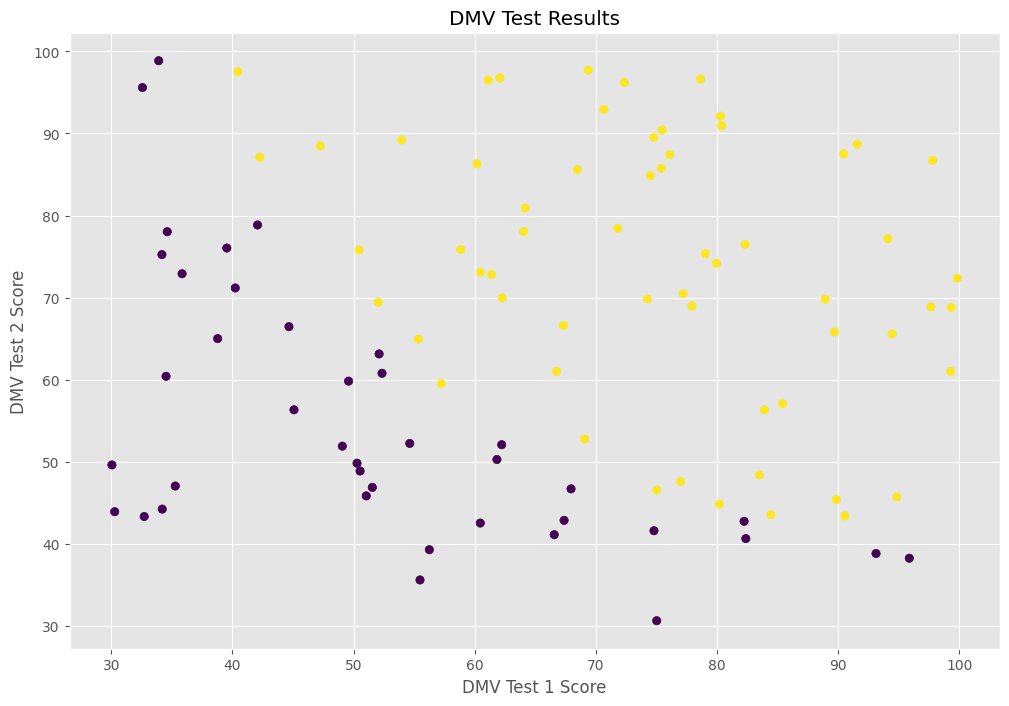

In [4]:
# Visualize the data
plt.scatter(data['DMV_Test_1'], data['DMV_Test_2'], c=data['Results'], cmap='viridis')
plt.xlabel('DMV Test 1 Score')
plt.ylabel('DMV Test 2 Score')
plt.title('DMV Test Results')
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [5]:
def sigmoid(z):

  return 1 / (1 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [6]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    gradient = (1/m) * ((X.T @ h) - (X.T @ y))
    return cost, gradient

### Task 6: Cost and Gradient at Initialization
---

In [7]:
# Prepare data for logistic regression
X = data[['DMV_Test_1', 'DMV_Test_2']].values
y = data['Results'].values

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Initialize theta to zeros
theta = np.zeros(X.shape[1])

# Compute cost and gradient at initialization
cost, gradient = cost_function(theta, X, y)

print(f"Cost at initialization: {cost}")
print(f"Gradient at initialization: {gradient}")

Cost at initialization: 0.6931471805599453
Gradient at initialization: [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    eps = 1e-12
    cost = (-1/m) * np.sum(y * np.log(h + eps) + (1 - y) * np.log(1 - h + eps))
    gradient = (1/m) * (X.T @ (h - y))   # FIXED
    return cost, gradient

# Prepare data
X = data[['DMV_Test_1', 'DMV_Test_2']].values
y = data['Results'].values

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept
X = np.c_[np.ones(X.shape[0]), X]

# Initialize theta
theta = np.zeros(X.shape[1])

# Gradient Descent
alpha = 0.1
epochs = 1000
losses = []

for i in range(epochs):
    cost, grad = cost_function(theta, X, y)
    theta -= alpha * grad
    losses.append(cost)

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

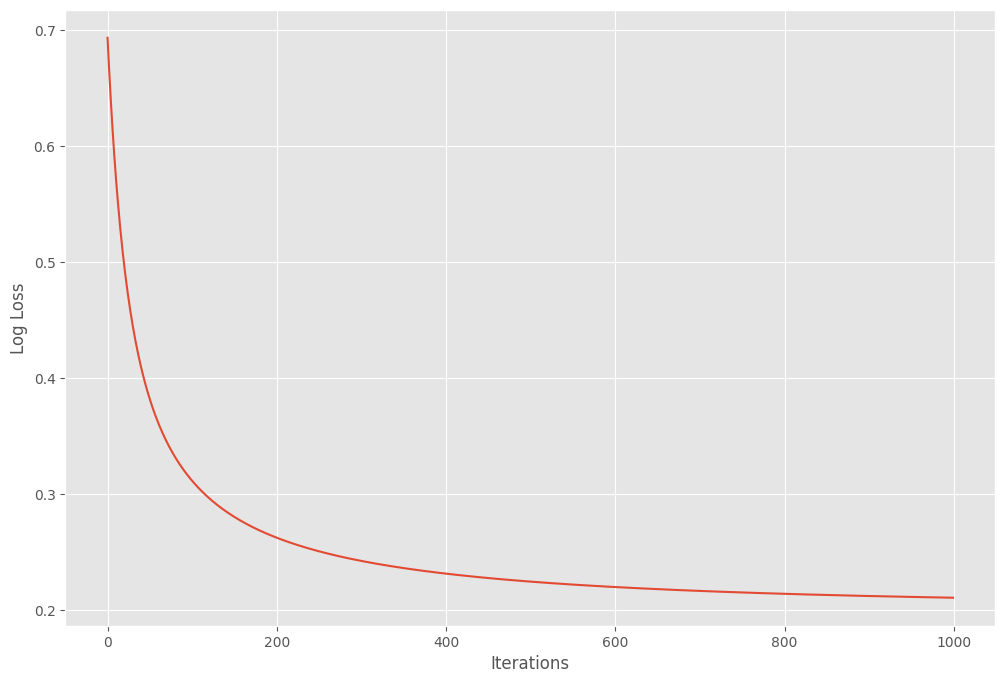

Final cost: 0.21053069022216064
Theta: [1.2713074  3.04859891 2.81285428]


In [17]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.show()

print("Final cost:", cost)
print("Theta:",theta)

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

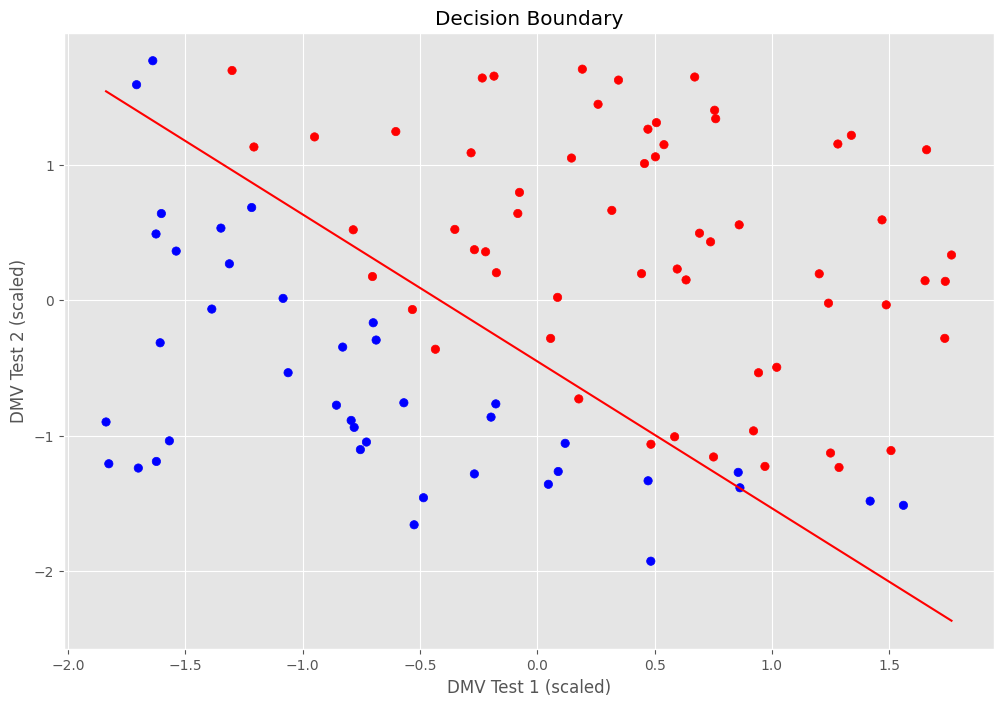

In [20]:

x1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
x2 = -(theta[0] + theta[1]*x1) / theta[2]

plt.scatter(X[:,1], X[:,2], c=y, cmap='bwr')
plt.plot(x1, x2, 'r-')
plt.xlabel("DMV Test 1 (scaled)")
plt.ylabel("DMV Test 2 (scaled)")
plt.title("Decision Boundary")
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [24]:
def predict(theta, X):

    h = sigmoid(X @ theta)
    predictions = (h >= 0.5).astype(int)
    return predictions

In [23]:
# Make predictions using the optimized theta
predictions = predict(theta, X)

# Calculate accuracy
accuracy = np.mean(predictions == y) * 100

print(f"Accuracy of the model: {accuracy}%")

Accuracy of the model: 89.0%


In [27]:

random_test_1 = np.random.uniform(data['DMV_Test_1'].min(), data['DMV_Test_1'].max())
random_test_2 = np.random.uniform(data['DMV_Test_2'].min(), data['DMV_Test_2'].max())

print(f"Random values: DMV Test 1 = {random_test_1:.2f}, DMV Test 2 = {random_test_2:.2f}")

# Preprocess the random values using the same scaler fitted on the training data
random_values_scaled = scaler.transform([[random_test_1, random_test_2]])

# Add the intercept term
random_values_scaled = np.c_[np.ones(random_values_scaled.shape[0]), random_values_scaled]

# Make a prediction using the optimized theta
prediction_random = predict(theta, random_values_scaled)

print(f"Prediction for these values: {prediction_random[0]}")

# Interpret the prediction
if prediction_random[0] == 1:
    print("Based on the scores, the model predicts the applicant would be admitted.")
else:
    print("Based on the scores, the model predicts the applicant would not be admitted.")

Random values: DMV Test 1 = 53.91, DMV Test 2 = 41.62
Prediction for these values: 0
Based on the scores, the model predicts the applicant would not be admitted.
Random values: DMV Test 1 = 95.25, DMV Test 2 = 55.14
Prediction for these values: 1
Based on the scores, the model predicts the applicant would be admitted.
